# 测试MetroDraw文件夹下的Draw_map.py

## 测试Draw_map类

In [1]:
# # 安装MeteoPy之后，正式使用不需要这两句 # #
import sys
sys.path.append('../../')
# # # # # # # # # # # # # # # # # # # # # #
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from MeteoPy import Draw_map
from MeteoPy import adjust_sub_axes

In [2]:
# # 读取绘图数据
# # 获取近30年海平面气压1991-2020
test_data1_ = xr.open_dataarray('../TestData/slp.mon.mean.nc')
test_data1 = test_data1_.loc['1991-01-01':'2020-12-01']  # 索引时间
lon, lat = test_data1['lon'], test_data1['lat']  # 获取经纬度
test_data1 = np.array(test_data1).reshape(test_data1.shape[0] // 12, 12, 
                                          test_data1.shape[1], test_data1.shape[2])  # 重铸维度，方便月平均
test_data1 = np.mean(test_data1, axis=1)  # 月平均

# # 获取近30年Nino3.4指数1990-2020
test_data2 = pd.read_csv('../TestData/nino34.txt', sep='\s+', header=None, skiprows=1, skipfooter=3,
                         names=['年'] + [str(i) + '月' for i in range(1, 13)], index_col=['年'], 
                         engine='python')
test_data2 = test_data2.loc[1991:2020]
test_data2 = test_data2.mean(axis=1)  # 月平均

# # slp与Nino3.4指数做相关
r, p = np.zeros((test_data1.shape[1], test_data1.shape[2])), np.zeros((test_data1.shape[1], test_data1.shape[2]))
for i in range(test_data1.shape[1]):
    for j in range(test_data1.shape[2]):
        r[i, j], p[i, j] = pearsonr(test_data2, test_data1[:, i, j])

### 测试填色图、打点图，以及南海小地图

GlobalFont={'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal', 'color': 'black', 'size': 14}
cnmap={'country': '中华人民共和国', 'province': None, 'city': None, 'district': None, 'level': None, 'inline': True, 'linewidth': 0.8, 'color': 'k'}
grid={'linestyle': 'dotted', 'linewidth': 1, 'alpha': 0.4}


c:\Users\NH4NO3nice\miniconda3\envs\MeteoPyTestEnv\lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons
c:\Users\NH4NO3nice\miniconda3\envs\MeteoPyTestEnv\lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_g

GlobalFont={'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal', 'color': 'black', 'size': 14}
x_axis={'xticks': array([ 80.,  90., 100., 110., 120., 130.]), 'font_tick': {'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal', 'color': 'black', 'size': 14}}
y_axis={'yticks': array([ 5., 15., 25., 35., 45.]), 'font_tick': {'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal', 'color': 'black', 'size': 14}}
tags= {'(a)': [0.04, 1.03, {'font': {'color': 'red', 'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal', 'size': 14}}], 'SLP & Nino3.4': [0.5, 1.03, {'font': {'size': 16, 'color': 'blue'}}]}
tags= {'(a)': [0.04, 1.03, {'font': {'color': 'red', 'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal', 'size': 14}}], 'SLP & Nino3.4': [0.5, 1.03, {'font': {'size': 16, 'color': 'blue', 'family': 'Times New Roman', 'style': 'normal', 'weight': 'normal'}}]}
type={'contourf': {'levels': array([-1.0000000e+00, -9.5000000e-01,

c:\Users\NH4NO3nice\miniconda3\envs\MeteoPyTestEnv\lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons
c:\Users\NH4NO3nice\miniconda3\envs\MeteoPyTestEnv\lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_g

type={'contourf': {'levels': [0, 0.1, 1], 'hatches': ['..', None], 'cmap': None, 'cbar': None}, 'contour': None, '南海': None}


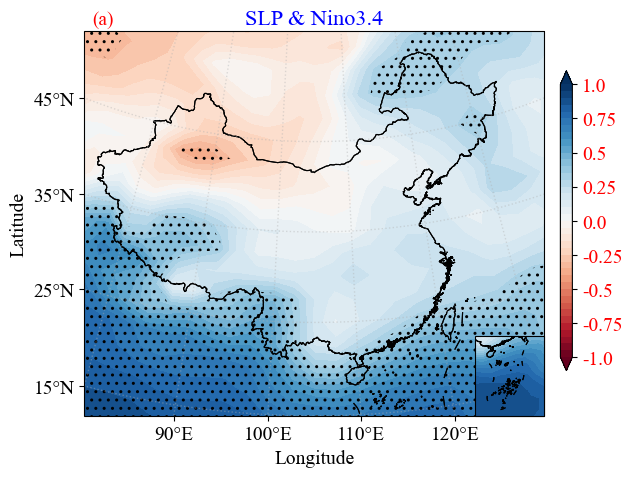

In [6]:
map_proj = ccrs.LambertConformal(
    central_longitude=105, standard_parallels=(25, 47)
)
# # 创建空白画布
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=map_proj)
# # 创建绘图实例
draw = Draw_map()
draw.comunity_maps(ax, extent=[80, 130, 15, 55], 
                   x_axis={'xticks':np.arange(80, 130.1, 10), 'xlabel':'Longitude'},
                   y_axis={'yticks':np.arange(5, 45.1, 10), 'ylabel':'Latitude'}, 
                   cnmap={'country':'中华人民共和国'}, 
                   tags={'(a)':[0.04, 1.03, {'font':{'color':'red'}}], 
                         'SLP & Nino3.4':[0.5, 1.03, {'font':{'size':16, 'color':'blue'}}]})
# 相关系数r填色图
draw.draw_contour_f(fig, ax, lon, lat, r, type={'contourf':{'levels':np.arange(-1, 1.01, 0.05), 'cmap':'RdBu',
                                                            'cbar':{'position':[0.82, 0.2, 0.015, 0.6], 
                                                                    'yticks':np.arange(-1, 1.25, 0.25), 
                                                                    'font_tick':{'color':'red'}}}, 
                                                '南海':{'shrink':0.15}})
# p值打点图
draw.draw_contour_f(fig, ax, lon, lat, p, type={'contourf':{'levels':[0, 0.1, 1], 'hatches':['..', None]}})